In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import random

from keras.models import Model
from keras.layers import Input, Flatten
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import BatchNormalization, MaxPooling2D
from keras.layers import Dense, Dropout

In [2]:
def load_numpy():
    global X_train
    global Y_train
    global X_test 
    global Y_test  

    with open('/content/drive/MyDrive/IDEC/chest-array.npy','rb') as f:
        X_train = np.load(f)
        Y_train = np.load(f)
        X_test = np.load(f)
        Y_test = np.load(f)

    print("Read Numpy Data")

In [3]:
load_numpy()

Read Numpy Data


In [4]:
def conv_block(filters, inputs):
    x = SeparableConv2D(filters,
                        kernel_size=3,
                        activation='relu',
                        padding='same')(inputs)

    x = SeparableConv2D(filters,
                        kernel_size=3,
                        activation='relu',
                        padding='same')(x)

    x = BatchNormalization()(x)

    output = MaxPooling2D(pool_size=2)(x)

    return output     

In [5]:
def dense_block(units, drop, inputs):
    x = Dense(units=units,
              activation='relu')(inputs)

    x = BatchNormalization()(x)

    output = Dropout(drop)(x)

    return output

In [6]:
EPOCH = 200
BATCH_SIZE = 100
RES = 180
SHAPE = (RES, RES, 3)

In [7]:
# Design Network

input = Input(shape=(SHAPE))

x = Conv2D(filters=16,
           kernel_size=3,
           activation='relu',
           padding='same')(input)

x = Conv2D(filters=16,
           kernel_size=3,
           activation='relu',
           padding='same')(x)

x = MaxPooling2D(pool_size=2)(x)

x = conv_block(32,x)

x = conv_block(64,x)

x = conv_block(128,x)
x = Dropout(0.2)(x)

x = conv_block(256,x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = dense_block(512, 0.7, x)
x = dense_block(128, 0.5, x)
x = dense_block(64, 0.3, x)

output = Dense(units=1,
          activation='sigmoid')(x)

model = Model(inputs=input,
              outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 90, 90, 32)        688       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 90, 90, 32)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 32)        128   

In [8]:
# Train Network

model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['acc'])

print("Start Train\n")

begin = time()
model.fit(x=X_train,
          y=Y_train,
          epochs=EPOCH,
          batch_size=BATCH_SIZE,
          verbose=1)
end = time()

print("Learning TIme : {:.2f}".format(end-begin))

model.save_weights('classification.h5')

Start Train

Epoch 1/200
10/10 [==============================] - 9s 306ms/step - loss: 1.0307 - acc: 0.4454
Epoch 2/200
10/10 [==============================] - 3s 319ms/step - loss: 0.9537 - acc: 0.5060
Epoch 3/200
10/10 [==============================] - 3s 321ms/step - loss: 0.8887 - acc: 0.5505
Epoch 4/200
10/10 [==============================] - 3s 312ms/step - loss: 0.7731 - acc: 0.6001
Epoch 5/200
10/10 [==============================] - 3s 321ms/step - loss: 0.7436 - acc: 0.6098
Epoch 6/200
10/10 [==============================] - 3s 322ms/step - loss: 0.7236 - acc: 0.6240
Epoch 7/200
10/10 [==============================] - 3s 319ms/step - loss: 0.7159 - acc: 0.6488
Epoch 8/200
10/10 [==============================] - 3s 315ms/step - loss: 0.6598 - acc: 0.6844
Epoch 9/200
10/10 [==============================] - 3s 313ms/step - loss: 0.6409 - acc: 0.6808
Epoch 10/200
10/10 [==============================] - 3s 321ms/step - loss: 0.5771 - acc: 0.7207
Epoch 11/200
10/10 [======

In [9]:
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=1)
print("Final Loss : {:.2f}".format(score[0]))
print("Final Accuracy : {:.2f}".format(score[1]))

7/7 [==============================] - 1s 41ms/step - loss: 0.3628 - acc: 0.8600
Final Loss : 0.36
Final Accuracy : 0.86


[136]
Label : [1.]
Pred : [[0.9876652]]


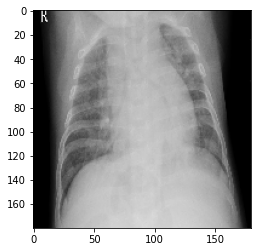

In [10]:
total = len(X_test)
pick = random.sample(range(0,total),1)
print(pick)

plt.imshow(X_test[pick].reshape(RES, RES, 3))
img = X_test[pick].reshape(1, RES, RES, 3)
pred = model.predict(img)

print("Label :", Y_test[pick])
print("Pred :", pred)

In [11]:
from sklearn.metrics import confusion_matrix, f1_score

print("Confusion Matrix")
pred = model.predict(X_test)
pred = np.squeeze(pred)
pred = (pred > 0.5)
print(confusion_matrix(Y_test, pred))

Confusion Matrix
[[88 12]
 [16 84]]
